In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
FILEPATH = "data/insurance.csv"
df = pd.read_csv(FILEPATH)

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
for column in df.columns:
    print(df[column].isnull().sum())

0
0
0
0
0
0
0


In [5]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
df.shape

(1338, 7)

In [8]:
df["age"].mean()

39.20702541106129

<AxesSubplot:ylabel='Frequency'>

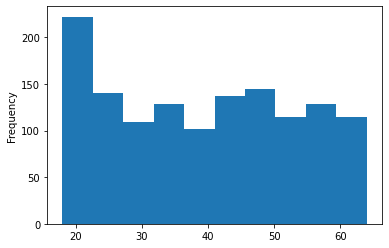

In [9]:
df["age"].plot(kind="hist")

In [10]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:ylabel='Frequency'>

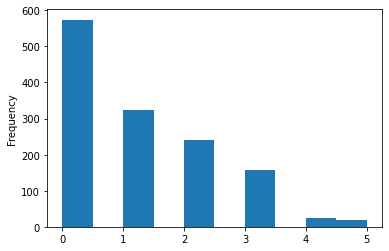

In [11]:
df["children"].plot(kind="hist")

In [12]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
df["charges"].mean()

13270.422265141257

In [17]:
df["charges"].median()

9382.033

<AxesSubplot:ylabel='Frequency'>

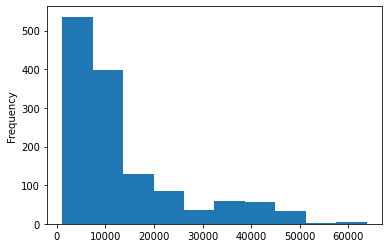

In [18]:
df["charges"].plot(kind="hist")

In [19]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [20]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
mask = df.dtypes == np.object_
categorical_cols = df.columns[mask]
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for category in categorical_cols:
    le.fit(df[category].drop_duplicates())
    df[category] = le.transform(df[category])

In [23]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


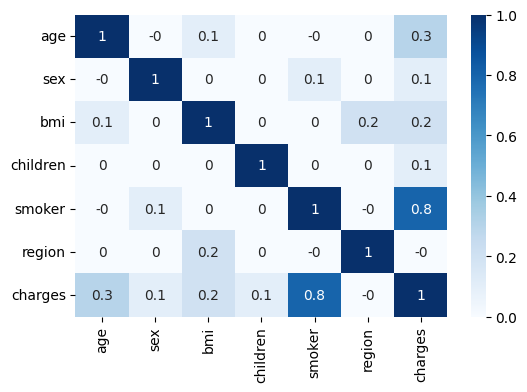

In [24]:
import seaborn as sns

plt.figure(dpi=100)
sns.heatmap(np.round(df.corr(),1), annot=True, cmap="Blues")
plt.show()

In [25]:
df.corr()["charges"].sort_values(ascending=True)

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

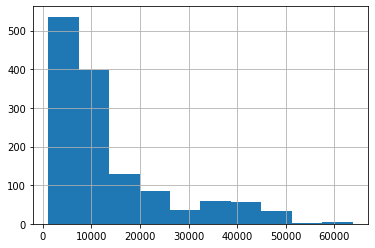

In [26]:
df["charges"].hist()

<AxesSubplot:ylabel='Frequency'>

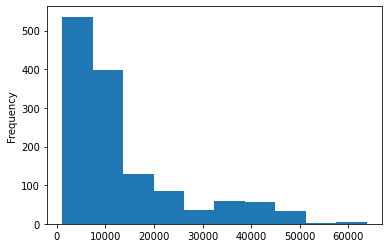

In [27]:
df["charges"].plot(kind="hist")

In [28]:
from scipy.stats.mstats import normaltest
normaltest(df["charges"].values)

NormaltestResult(statistic=336.8851220567733, pvalue=7.019807901276197e-74)

**1. Square root**

NormaltestResult(statistic=112.4605295472106, pvalue=3.7975744156203163e-25)

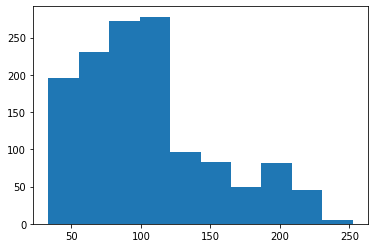

In [29]:
sqrt_charges = np.sqrt(df["charges"])
plt.hist(sqrt_charges)

sqrt_test_res = normaltest(sqrt_charges.values)
sqrt_test_res

**2. Log Transformation**

NormaltestResult(statistic=52.71670509113935, pvalue=3.5703676381337117e-12)

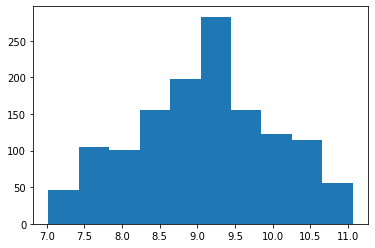

In [30]:
log_charges = np.log(df["charges"])
plt.hist(log_charges)

log_test_res = normaltest(log_charges.values)
log_test_res

**3. Box cox Transformation**

In [31]:
from scipy import boxcox

bc_result = boxcox(df["charges"])
boxcox_medv = bc_result[0]
lam = bc_result[1]

ImportError: cannot import name 'boxcox' from 'scipy' (C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py)

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, r2_score, f1_score, recall_score, precision_score

In [33]:
insurance_data = df

insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [34]:
mask = insurance_data.dtypes == np.object_
categorical_cols = insurance_data.columns[mask]

In [35]:
X = insurance_data.drop(["charges", "region"], axis=1)
y = insurance_data["charges"]

In [36]:
X.head(10)

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
5,31,0,25.740,0,0
6,46,0,33.440,1,0
7,37,0,27.740,3,0
8,37,1,29.830,2,0
9,60,0,25.840,0,0


In [37]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=42)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(936, 20) (402, 20) (936,) (402,)


In [40]:
X_train

array([[61.   ,  0.   , 31.16 , ...,  0.   ,  0.   ,  0.   ],
       [46.   ,  1.   , 27.6  , ...,  0.   ,  0.   ,  0.   ],
       [54.   ,  0.   , 31.9  , ...,  9.   ,  0.   ,  0.   ],
       ...,
       [58.   ,  1.   , 25.175, ...,  0.   ,  0.   ,  0.   ],
       [37.   ,  0.   , 47.6  , ...,  4.   ,  2.   ,  1.   ],
       [55.   ,  1.   , 29.9  , ...,  0.   ,  0.   ,  0.   ]])

In [41]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [42]:
# Data Retrieving 
insurance_data = pd.read_csv('data/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
# Select the object (string) columns
mask = insurance_data.dtypes == np.object_
categorical_cols = insurance_data.columns[mask]

le = LabelEncoder()
for category in categorical_cols:
    le.fit(insurance_data[category].drop_duplicates())
    insurance_data[category] = le.transform(insurance_data[category])
    
X = insurance_data.drop(['charges','region'], axis=1)
y = insurance_data.charges

# create folds 
kf = KFold(shuffle=True, random_state=42, n_splits=3)

In [45]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())])

params = {
    "polynomial_features__degree": range(3),
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.8397766582186675, {'polynomial_features__degree': 2})

In [46]:
best_vanilla_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("vanilla_regression", LinearRegression())])

best_vanilla_estimator.fit(X, y)
best_vanilla_estimator.score(X, y)

0.8439617668857133

In [47]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "lasso_regression__alpha": np.geomspace(0.01, 30, 50)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.458e+09, tolerance: 1.297e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.816e+09, tolerance: 1.289e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

(0.8401685994822629,
 {'lasso_regression__alpha': 30.0, 'polynomial_features__degree': 2})

In [48]:
best_lasso_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.85))])

best_lasso_estimator.fit(X, y)
best_lasso_estimator.score(X, y)

0.8439616624263708

In [54]:
# estimator = Pipeline([
#     ("scaler", StandardScaler()),
#     ("polynomial_feature", PolynomialFeatures()),
#     ("ridge_regression", Ridge())
# ])

estimator = Pipeline([
    ("scaler", StandardScaler()),
    ("polynomial_features", PolynomialFeatures()),
    ("ridge_regression", Ridge())
])

params = {
    "polynomial_features__degree": [1,2,3],
    "ridge_regression__alpha": np.geomspace(2,30,20)
}

grid = GridSearchCV(estimator=estimator, param_grid=params, cv=kf)

grid.fit(X, y)

grid.best_score_, grid.best_params_

(0.8399073635712647,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 16.96379809972482})

In [50]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "ridge_regression__alpha": np.geomspace(2, 30, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.8399073635712647,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 16.96379809972482})

In [55]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [56]:
pf = PolynomialFeatures(degree=2)
s = StandardScaler()

X_pf = pf.fit_transform(X)
X_s = s.fit_transform(X_pf)
X_train, X_test, y_train, y_test = train_test_split(X_s, y,
                                                    shuffle=True, test_size=0.3, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_R2 = r2_score(y_test, linearRegression.predict(X_test)) 
print(linearRegression_rmse)
print(linearRegression_R2)

4496.560110896625
0.8621029955994312


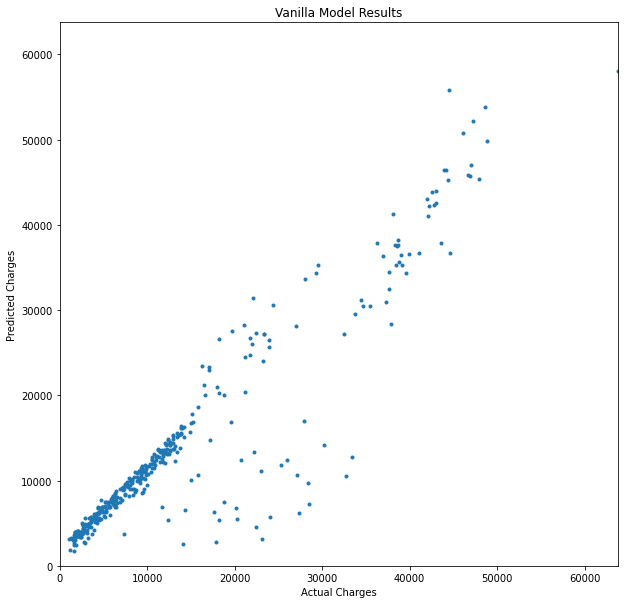

In [59]:
f = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Vanilla Model Results');

In [60]:
from sklearn.linear_model import LassoCV
alphas = np.geomspace(0.1, 400, 1000)
lassoCV = LassoCV(alphas=alphas,
                  max_iter=10000,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
lassoCV_R2 = r2_score(y_test, lassoCV.predict(X_test)) 

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower
print(lassoCV_R2)
13.7454744402372 

13.7454744402372 4496.577651935266
0.8621019197275019


13.7454744402372

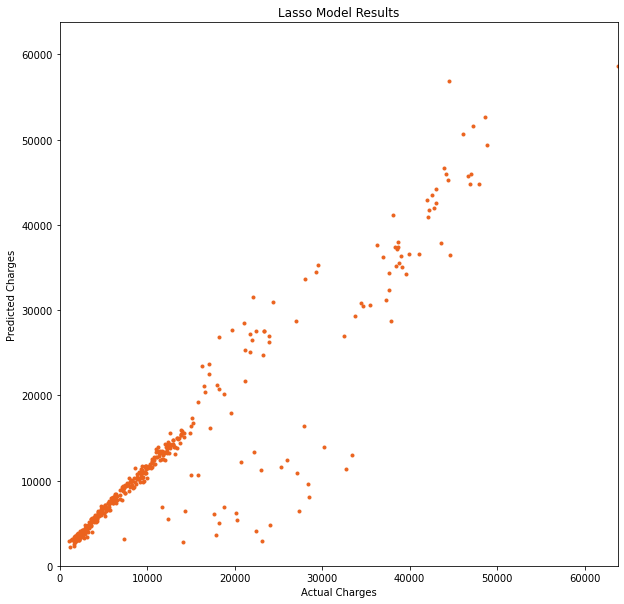

In [61]:
f = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.plot(y_test, lassoCV.predict(X_test), 
         marker='o', ls='', color='#eb631e', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Lasso Model Results');